<a href="https://colab.research.google.com/github/pthomas000/Adv_Data_Analysis/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
!pip install mglearn
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=863f2b211ea73ffdc01b23faa2543ab87c9b090f2a45fac3d23007bbf7421880
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [10]:
# Import data
df = pd.read_csv (r'/content/sample_data/data(1).csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
# Assign target
y = df['diagnosis']
print(y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [17]:
# Assign features
X = df[['radius_mean','texture_mean','perimeter_mean','area_mean', 'smoothness_mean','compactness_mean','concavity_mean','symmetry_mean', 'fractal_dimension_mean']]
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  symmetry_mean  fractal_d

In [18]:
# Split into training and testing set (or use stratified split in below code chunk)

from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=None)

In [ ]:
#(Alternative way to split)

# # the stratify split works well however for the Iris dataset 

# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.datasets import load_iris

# # load Iris dataset
# iris = load_iris()

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(iris.data, iris.target):
#     X_iris_train = iris.data[train_index]
#     X_iris_test = iris.data[test_index]
#     y_iris_train = iris.target[train_index]
#     y_iris_test = iris.target[test_index]

In [ ]:
# # Applying a model... I don't think I have to do this yet?

# from sklearn.linear_model import LinearRegression

# # instantiate a model and fit it to the training set
# linreg = LinearRegression().fit(X_train, y_train)

In [ ]:
# # evaluate the model on the test set

# print("Test set score: {:.2f}".format(linreg.score(X_test, y_test)))

In [ ]:
# Explore training set
DataFrame.info()
DataFrame.describe()

In [ ]:
# Data cleaning: Address any missing values in your dataset. 
# Create second cleaned version of training, apply same to testing set. 
# If replacing values, use IMPUTER scikit learn.

# Option for dealing with missing values:
##### “Get rid of the corresponding samples.”
##### “Get rid of the whole attribute (column).”
##### “Set the values to some value (zero, the mean, the median, etc.).”

In [21]:
df.isnull().values.any()

True

In [20]:
# using the mean method here for missing values
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train)
SimpleImputer()
X_train_new = imp_mean.transform(X_train)
X_test_new = imp_mean.transform(X_test)

In [43]:
X_train.isnull().values.any()

False

In [44]:
X_test.isnull().values.any()

False

In [28]:
%matplotlib inline 
import matplotlib.pyplot as plt 


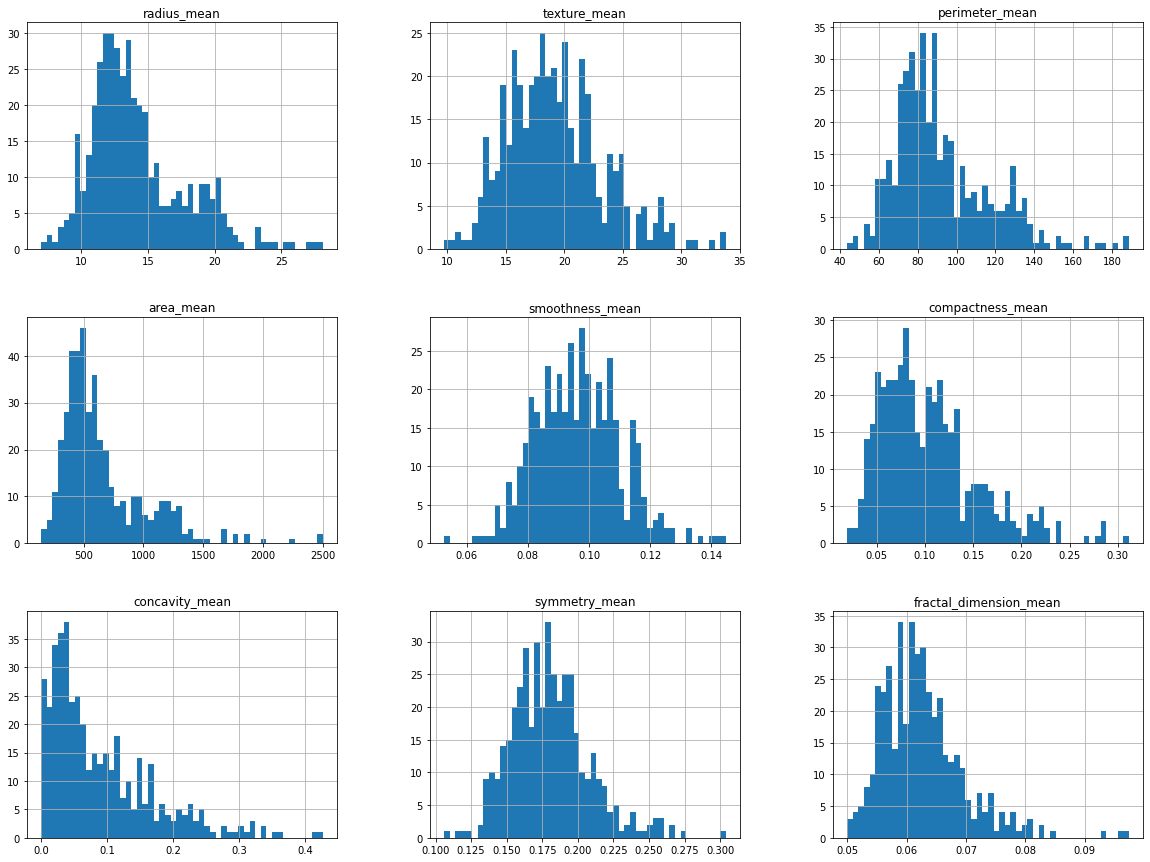

In [33]:
# Visualize training set data
# X_train.hist
# plotting.scatter_matrix()

X_train.hist(bins=50, figsize=(20,15)) 
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8af724e310>,
      dtype=object)

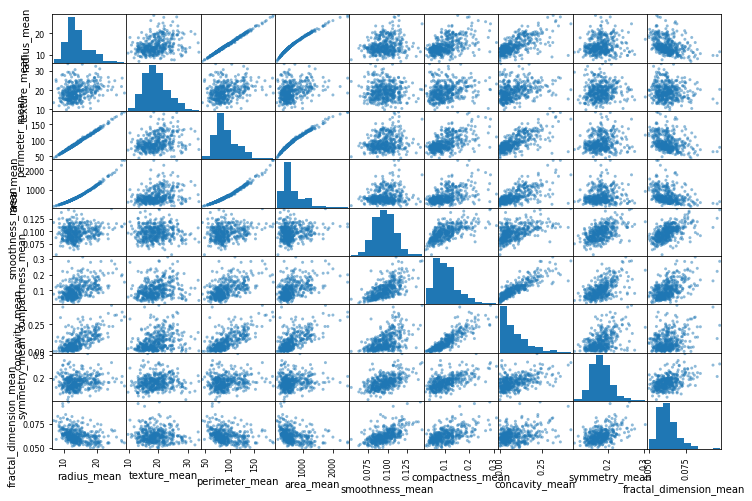

In [35]:
from pandas.plotting import scatter_matrix

attributes = ['radius_mean','texture_mean','perimeter_mean','area_mean', 'smoothness_mean','compactness_mean','concavity_mean','symmetry_mean', 'fractal_dimension_mean']
scatter_matrix(X_train[attributes], figsize=(12, 8))

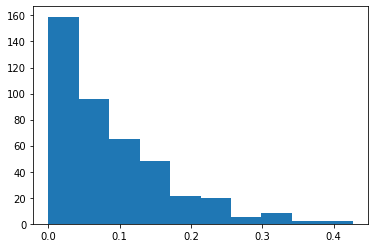

In [38]:
# Apply transformations to your data. 
# In your Jupetyr notebook apply, squaring, cubing, logarithmic, and exponentials transformations 
# to two features in your dataset. Plot the histograms and scatter matrices of the resultant data.

# first feature
feature_one = "concavity_mean"
feature_two = "symmetry_mean"
plt.hist(X_train[feature_one].values.reshape(-1, 1))
plt.show()

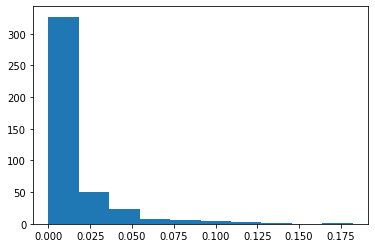

In [39]:
plt.hist(X_train[feature_one].values.reshape(-1, 1)**2, bins=10)
plt.show()

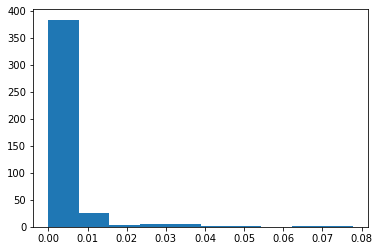

In [51]:
plt.hist(X_train[feature_one].values.reshape(-1, 1)**3, bins=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


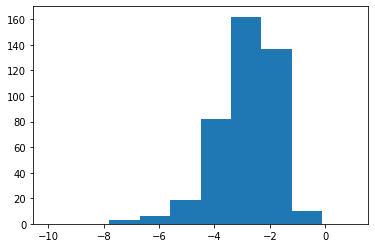

In [62]:
plt.hist(np.log(X_train[feature_one].values.reshape(-1, 1)), bins=10, range = [-10,1])
plt.show()

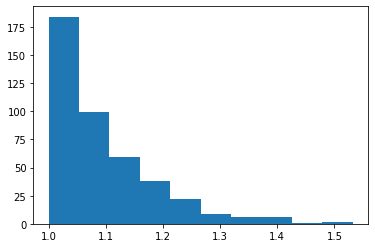

In [45]:
plt.hist(np.exp(X_train[feature_one].values.reshape(-1, 1)), bins=10)
plt.show()

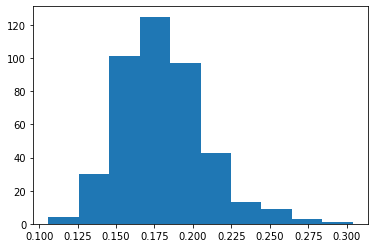

In [46]:
# second feature
plt.hist(X_train[feature_two].values.reshape(-1, 1))
plt.show()

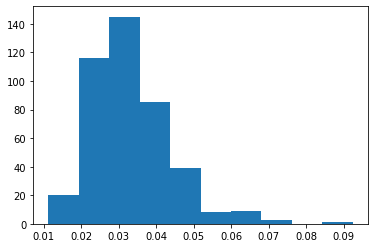

In [47]:
plt.hist(X_train[feature_two].values.reshape(-1, 1)**2, bins=10)
plt.show()

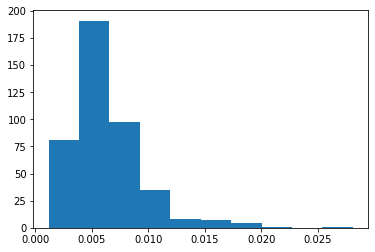

In [48]:
plt.hist(X_train[feature_two].values.reshape(-1, 1)**3, bins=10)
plt.show()

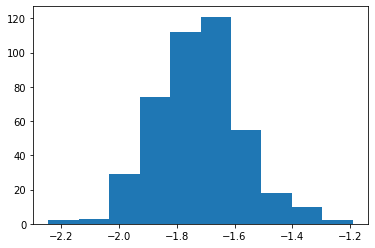

In [49]:
plt.hist(np.log(X_train[feature_two].values.reshape(-1, 1)), bins=10)
plt.show()

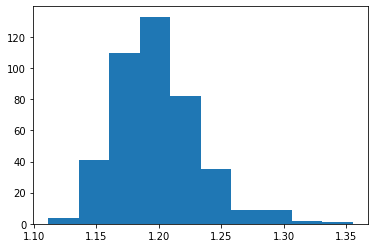

In [50]:
plt.hist(np.exp(X_train[feature_two].values.reshape(-1, 1)), bins=10)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8af3855750>,
      dtype=object)

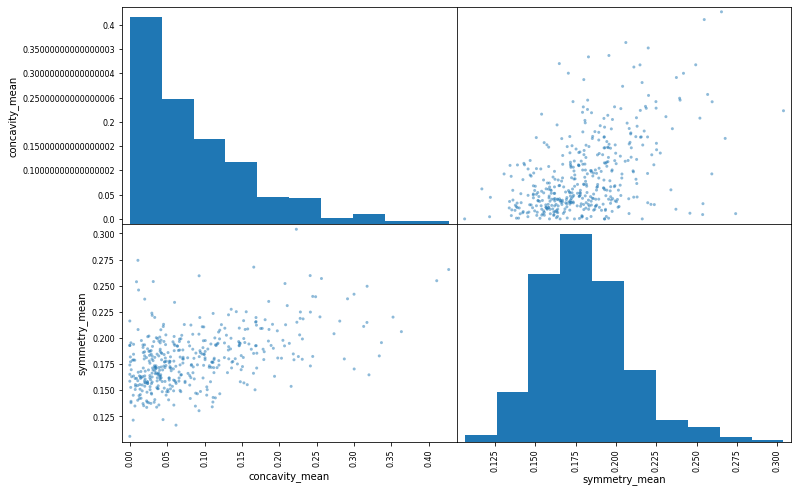

In [63]:
#scatter matrix for the two features together
attributes_two = [feature_one, feature_two]
scatter_matrix(X_train[attributes_two], figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8af27f3e10>,
      dtype=object)

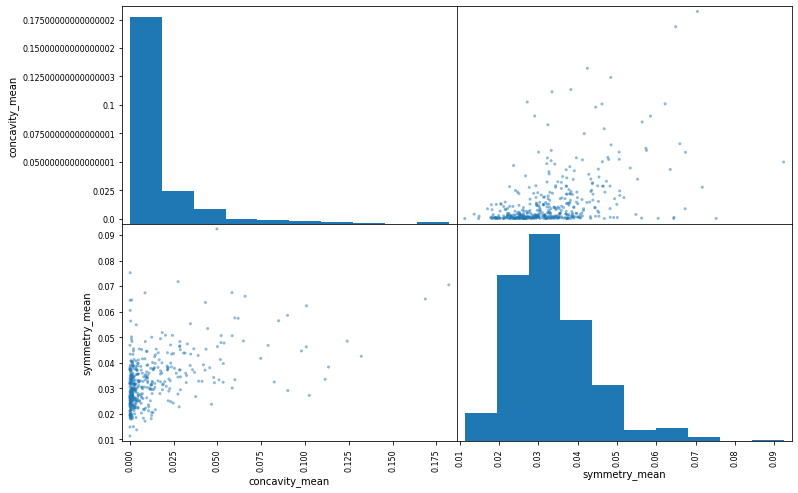

In [65]:
#scatter matrix for the squared data for each of the two features
scatter_matrix(X_train[attributes_two]**2, figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8af25d7150>,
      dtype=object)

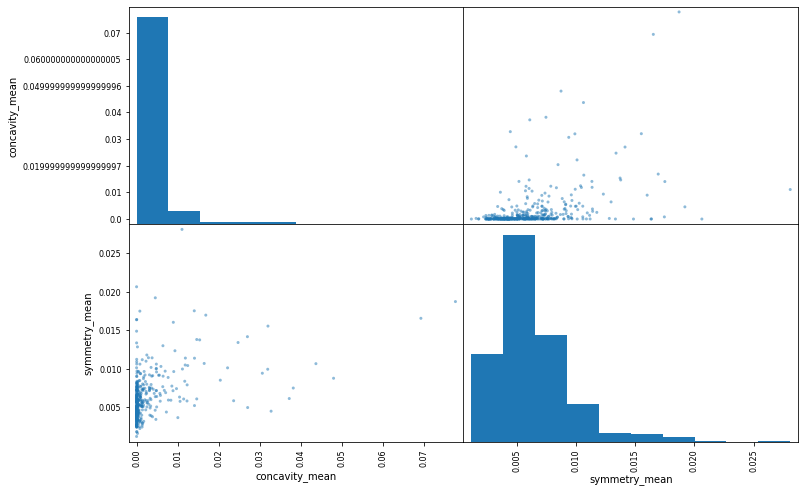

In [66]:
#scatter matrix for the cubed data for each of the two features
scatter_matrix(X_train[attributes_two]**3, figsize=(12, 8))